# Music Drill Sergant

# The Plan
## Preliminary Analysis

The purpose of the preliminary analysis is to convert audio format to spectogram, convert several samples and compare them. Do they look different?

## Sampling
We also want to scrap a sampling software, the idea is to record multiple notes in sequence:

1) Get ready to play E2 note Beep-beep-beeeeep (1 sec)
2) Play E2 (10 sec)
    1) hit special button to mark it as invalid
3) loop 1, 2 for next note (F2)

This way we can record it from multiple devices and split accodenly based on master record.


## Preliminary Analysis

Some useful references:

* Audio Deep Learning Made Simple: Sound Classification, Step-by-Step.
<https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5>


Sound samples

* <https://urbansounddataset.weebly.com/urbansound8k.html>


Notes on guitar:

* https://www.strumpatterns.com/Articles/GuitarNeckDiagram.html


### Installation notes

sound backend for torch audio

```
pip install soundfile
```

In [2]:
!pip install soundfile

  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)


# Notes

<https://dovelikesm.com/product_details/15812938.html>

![Guitar Fretboard Notes Chart | laboratoriomaradona.com.ar](images/FRETBOARD-AND-STAFF-DIAGRAM-Webpage-Version-800x755.png)

![Guitar Fretboard Notes Chart | laboratoriomaradona.com.ar](images/Rainbow-Music-Guitar-Fretboard-Notes-TAB-Finger-Positions-Chart.jpg)

<https://www.strumpatterns.com/Articles/GuitarNeckDiagram.html>

![www.strumpatterns.com](images/GuitarNeckNotesSample.jpg)

![www.strumpatterns.com](images/PianoOctaveNumbers.jpg)

In [95]:
import itertools
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

import matplotlib.pyplot as plt


In [93]:
def get_oct_note(note):
    return int(note[-1]),note[0:-1]

scale12notes = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]

# like on piano
scale88notes = \
    [f"{n}0" for n in scale12notes[-3:]] + \
    [f"{n}{o}" for o,n in itertools.product(range(1,8),scale12notes)] + \
    ["C8"]

ipE3 = scale88notes.index("E3")
ipE5 = scale88notes.index("E5")

# 19th thread last on our guitar
guitar_all_notes = scale88notes[ipE3:ipE5+1+19]

notes_on_neck = {
    1:"E5",
    2:"B4",
    3:"G4",
    4:"D4",    
    5:"A3",
    6:"E3"
}

guitar_notes_cat_type = pd.CategoricalDtype(categories=guitar_all_notes, ordered=True)

#for id, note in enumerate(guitar_all_notes,1):
#    print(f"{id:2d}, {note:3}, 1.0")

In [129]:
guitar_notes_cat_type

CategoricalDtype(categories=['E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3', 'B3', 'C4',
                  'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4',
                  'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5',
                  'G5', 'G#5', 'A5', 'A#5', 'B5', 'C6', 'C#6', 'D6', 'D#6',
                  'E6', 'F6', 'F#6', 'G6', 'G#6', 'A6', 'A#6', 'B6'],
, ordered=True)

In [14]:
"A5"[0:-1]

'A'

### Let's play

In [120]:
import math, random
import pandas as pd
import torch
import torchaudio

import librosa

torch.random.manual_seed(0)
#from torchaudio import transforms
from IPython.display import Audio

In [114]:
def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

In [94]:
sample1 = "./samples/acustic_guitar_classic_while_scale.ogg"
metadata = torchaudio.info(sample1)
signal_stereo, sample_rate = torchaudio.load(sample1)

# lets just use one channel for now
signal = signal_stereo[0,:].clone()
n_points = int(signal.shape[0])
sample_rate = float(sample_rate)
t = torch.arange(start=0, end=n_points/sample_rate, step=1.0/sample_rate)

record_notes_labels = pd.read_csv("samples/acustic_guitar_classic_while_scale_labels.csv", sep="\t")
record_notes_labels.name = record_notes_labels.name.astype(guitar_notes_cat_type)
record_notes_labels['it_start'] = (record_notes_labels['t_start']*sample_rate+0.5).round().astype("int64")
record_notes_labels['it_end'] = (record_notes_labels['t_end']*sample_rate).astype("int64")


#metadata.num_channels

In [112]:
# first sample
Audio("./samples/acustic_guitar_classic_while_scale.ogg")

In [130]:
record_notes_labels

,id,name,t_start,t_end,it_start,it_end
0,1,E3,0.091429,1.356610,4033,59826
1,2,F3,1.356610,2.570159,59827,113344
2,3,F#3,2.570159,3.742766,113345,165055
3,4,G3,3.742766,4.847166,165056,213760
4,5,G#3,4.847166,6.037188,213761,266239
5,6,A3,6.037188,7.111111,266240,313599
6,7,A#3,7.111111,8.222766,313600,362623
7,8,B3,8.222766,9.311202,362624,410624
8,9,C4,9.311202,10.340136,410625,455999
9,10,C#4,10.340136,11.559184,456000,509760


<Axes: >

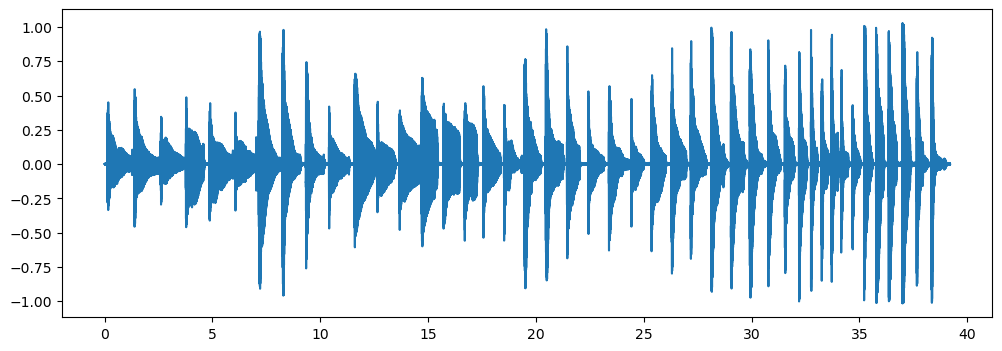

In [100]:
plt.figure(figsize=(12,4))
sns.lineplot(x=t,y=signal)

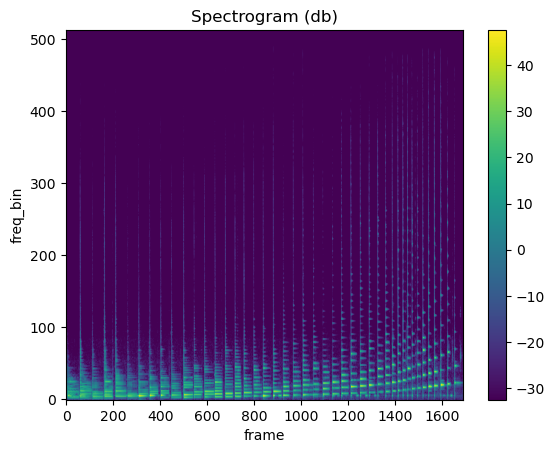

In [124]:
# First three notes
n_fft = 1024
win_length = None
hop_length = 1024

# Define transform
spectrogram = torchaudio.transforms.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
spec = spectrogram(signal)

# sns.heatmap(spec)
# plt.figure(figsize=(12,4))
plot_spectrogram(spec)

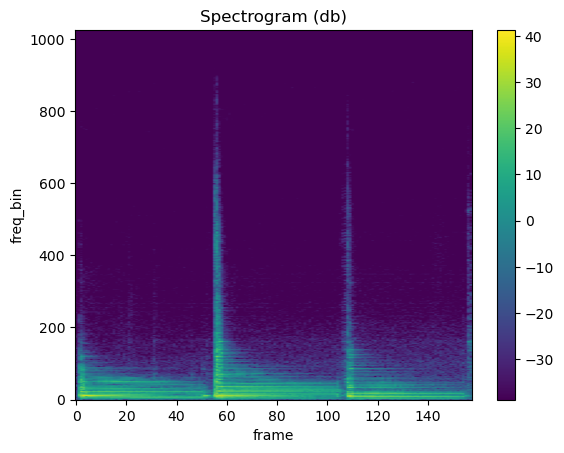

In [128]:
n_fft = 1024*2
win_length = None
hop_length = 1024

# Define transform
spectrogram = torchaudio.transforms.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
spec = spectrogram(signal[record_notes_labels['it_start'][0]:record_notes_labels['it_end'][2]])

# sns.heatmap(spec)
# plt.figure(figsize=(12,4))
plot_spectrogram(spec)

In [109]:
# spectrogramm
spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate, n_fft=1024, hop_length=None, n_mels=64)
spec = spectrogram(signal)

spec = torchaudio.transforms.AmplitudeToDB(top_db=80)(spec)

C:\ProgramData\Anaconda3\envs\cse676\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning:

At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.



In [106]:
spec.shape

torch.Size([64, 3377])

<Axes: >

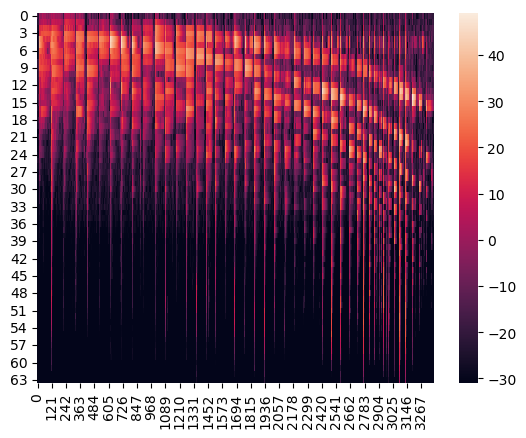

In [107]:
sns.heatmap(spec)

In [12]:
Audio(sig,sr)

OSError: [WinError 6] The handle is invalid

In [ ]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)

# Sampling App

pyaudio library
